In [2]:
import numpy as np
import scipy.signal as sg
import matplotlib.pyplot as plt
import cmocean
import seaborn as sns

import librosa

from utils import *

import soundfile as sf

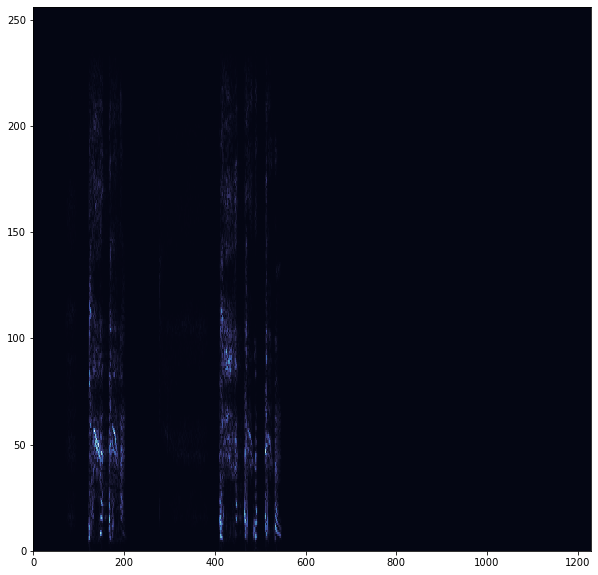

In [56]:
base = 128 # length of the simulation
duration = base # chirp will fill the observed area
SNR = 20

base = 128
b = 150
a = base - b

N = 4 * base
Nfft = 2 * base
t = np.arange(N)

# Noise only
w = np.random.randn(N)
# window
g = sg.gaussian(Nfft, np.sqrt((Nfft)/2/np.pi))
g = g/g.sum()

# bounds for detection (larger)
fmin = 0
fmax = base

#tmin = 2*base - (base-trunc) // 2
#tmax = 2*base + (base-trunc) // 2
tmin = base
tmax = 3*base

my_data, my_samplerate = sf.read("../samples/001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f.webm.flac")
#my_data, my_samplerate = sf.read("../samples/no-detectable_train_id_1171_audio_2020-10-18_at_14_09_27.290.ogg.flac")
#my_data, my_samplerate = sf.read("../samples/NEPS_COVID_TOS_d13eb2fb-057a-4764-a894-7147cc4f28ce.wav.flac")
#my_data, my_samplerate = sf.read("../samples/NEPS_COVID_TOS_d14db2be-5516-4342-8389-0811da1ea0c6.wav.flac")
#my_data, my_samplerate = sf.read("../samples/NEPS_COVID_TOS_d17fdbf2-ff3c-4655-8dac-7f7f37c57672.wav.flac")
#my_data, my_samplerate = sf.read("../samples/NEPS_COVID_TOS_ef53726b-d86b-4634-92f7-6a04423d3868.wav.flac")
#my_data, my_samplerate = sf.read("../samples/NEPS_COVID_TOS_ef71222d-4f95-4750-837c-bff6c64a1545.wav.flac")
#my_data, my_samplerate = sf.read("../samples/NEPS_COVID_TOS_ef73352c-0ef8-477d-acd9-3de1d4498aa6.wav.flac")
#my_data, my_samplerate = sf.read("../samples/cough-shallow.wav.flac")

def extr2minth(M,th):
    C,R = M.shape

    Mid_Mid = np.zeros((C,R), dtype=bool)

    for c in range(0, C):
        for r in range(0, R):
            #T = M[c-1:c+2,r-1:r+2]
            Mid_Mid[c, r] = M[c,r] < th #(np.min(T) == T[1, 1]) * (np.min(T) < th)
            #Mid_Mid[c, r] = (np.min(T) == T[1, 1])

    x, y = np.where(Mid_Mid)
    return x, y

spectro = librosa.stft(y = my_data, n_fft = 511, hop_length = 128, window='hann')

spec_mag = abs(spectro) # real numbers (magnitude)
spec_sqrd = spectro**2  # complex numbers 

# Do we even need to do this? It looks like it's just a copy
#s = np.zeros((256, len(spec_sqrd[1])))
#for i in range(256):
#    s[i] = spec_sqrd[i]

s2 = np.where(spec_mag < 0, 0, spec_mag)

_, ax = plt.subplots(figsize=(10, 10))
ax.pcolormesh(s2, cmap=cmocean.cm.ice)    


# detection --------------------------------------------
th = 1e-18
#th = 1e-8
x0, y0 = extr2minth(spec_mag, th)

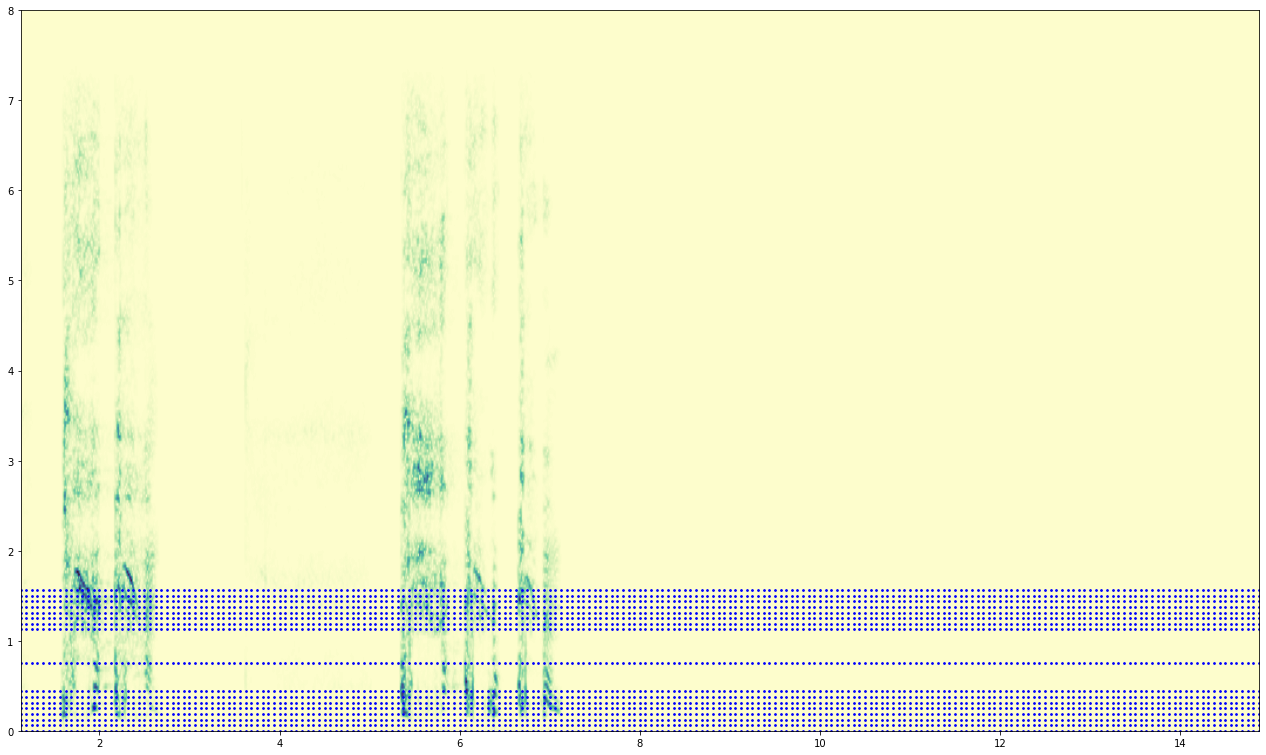

In [57]:


u = x0/np.sqrt(2*base)
v = y0/np.sqrt(2*base)

pos = np.zeros((len(u), 2))
pos[:, 0] = u
pos[:, 1] = v

# VIZ ---------------------------------------------------- 
side = 220 # size of square; equivalent to trunc
fmin = (max(0, (base-side)//2))/np.sqrt(2*base)
fmax = (min(base, (base+side)//2))/np.sqrt(2*base)
tmin = (base-side//2)/np.sqrt(2*base)
tmax = (base+side//2)/np.sqrt(2*base)

fig, ax = plt.subplots(figsize=(20, 20))

#ax.imshow(np.log10(Sww_t), origin='lower', 
ax.imshow(s2, origin='lower', 
    extent=[0, (2*base)/np.sqrt(2*base), 0, (base)/np.sqrt(2*base)], 
    cmap=cmocean.cm.deep)
ax.scatter(pos[:, 0], pos[:, 1], color='b', s=3)

ax.set_xlim([tmin, tmax])
ax.set_ylim([fmin, fmax])
fig.subplots_adjust(left=0.04, bottom=0.05)



In [ ]:
# Load image


hello


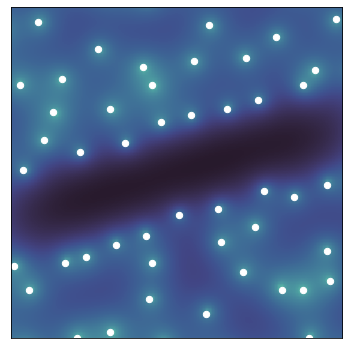

In [ ]:
base = 128 # length of the simulation
duration = base # chirp will fill the observed area
SNR = 20
Sww, pos_exp, stft, chirp = demoSpectrogramSignal(SNR, duration, viz=True, shrink=False)
